In [1]:
from nixtlats import TimeGPT
import pandas as pd
import plotly.graph_objects as go

def load_data(filename,x_column,y_column):
    df = filename
    df.index = pd.to_datetime(df[x_column])
    df.drop(columns=x_column,inplace=True)
    df[y_column] = df[y_column].astype(float)
    df['power'].resample('D').mean()
    return df


https://towardsdatascience.com/timegpt-the-first-foundation-model-for-time-series-forecasting-bf0a75e63b3a

https://docs.nixtla.io/docs/timegpt_quickstart

https://www.thdpth.com/p/what-people-are-missing-about-timegpt

https://aihorizonforecast.substack.com/p/timegpt-the-first-foundation-model

## Test

In [16]:
timegpt = TimeGPT(
    # defaults to os.environ.get("TIMEGPT_TOKEN")
    token = 'zY2vj4Mv2jGwSt6l5Uhagl1lqmtsxDPT9AqXkKW54sgF9oupNhHDb2gNDPVo65lCQVR9IZkAk6CLPFvcDM8gz8VXMLF6zFbZKSm2iLJSX2pRsQp5Dot4cIcPUIjB8lxkWvwohDwLxJNjOH9bDj1P2MWtwTXYLfnc56rHZcfPxJREM2GltbQHvoWn6bCo2H6f7J05DbOEPmnjYBDgC0B41CYZepi2WN3LrC5kn9VXttl6OGCGsUjGuyAqBWN2pGIR'
)

In [17]:
timegpt.validate_token()



INFO:nixtlats.timegpt:Happy Forecasting! :), If you have questions or need support, please email ops@nixtla.io


True

In [18]:
df = pd.read_csv('https://raw.githubusercontent.com/Nixtla/transfer-learning-time-series/main/datasets/air_passengers.csv')
df.head()

,timestamp,value
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


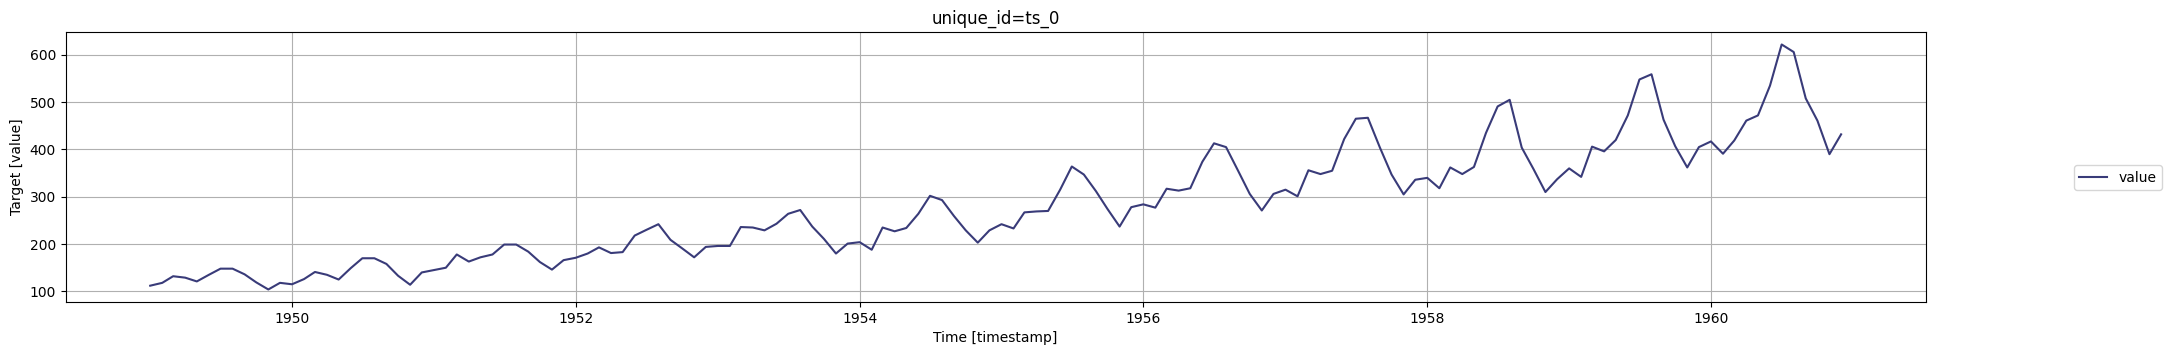

In [19]:
timegpt.plot(df, time_col='timestamp', target_col='value')


In [7]:
timegpt_fcst_df = timegpt.forecast(df=df, h=12, freq='MS', time_col='timestamp', target_col='value')
timegpt_fcst_df.head()

INFO:nixtlats.timegpt:Validating inputs...
INFO:nixtlats.timegpt:Preprocessing dataframes...
INFO:nixtlats.timegpt:Calling Forecast Endpoint...


,timestamp,TimeGPT
0,1961-01-01,437.837921
1,1961-02-01,426.062714
2,1961-03-01,463.116547
3,1961-04-01,478.244507
4,1961-05-01,505.646484


# MIT KODE

## LEVEL 1

In [30]:
timegpt = TimeGPT(
    # defaults to os.environ.get("TIMEGPT_TOKEN")
    token = 'zY2vj4Mv2jGwSt6l5Uhagl1lqmtsxDPT9AqXkKW54sgF9oupNhHDb2gNDPVo65lCQVR9IZkAk6CLPFvcDM8gz8VXMLF6zFbZKSm2iLJSX2pRsQp5Dot4cIcPUIjB8lxkWvwohDwLxJNjOH9bDj1P2MWtwTXYLfnc56rHZcfPxJREM2GltbQHvoWn6bCo2H6f7J05DbOEPmnjYBDgC0B41CYZepi2WN3LrC5kn9VXttl6OGCGsUjGuyAqBWN2pGIR'
)

In [35]:
# Read the CSV file and parse the 'time' column as datetime, setting it as index
lol = pd.read_csv('combined_level1.csv', parse_dates=['time'],  usecols=['time', 'power'])
lol.head()
lol['time'] = pd.to_datetime(lol['time'])

# Group by day, calculate daily average of 'y', and retain 'unique_id' as 1
daily_averages_level1 = lol.groupby(lol['time'].dt.date)['power'].mean().reset_index()

# Convert 'day' column back to a datetime object if needed
daily_averages_level1['time'] = pd.to_datetime(daily_averages_level1['time'])
daily_averages_level1.head()

,time,power
0,2022-09-01,11.913215
1,2022-09-02,11.685112
2,2022-09-03,11.272039
3,2022-09-04,11.190975
4,2022-09-05,11.552163


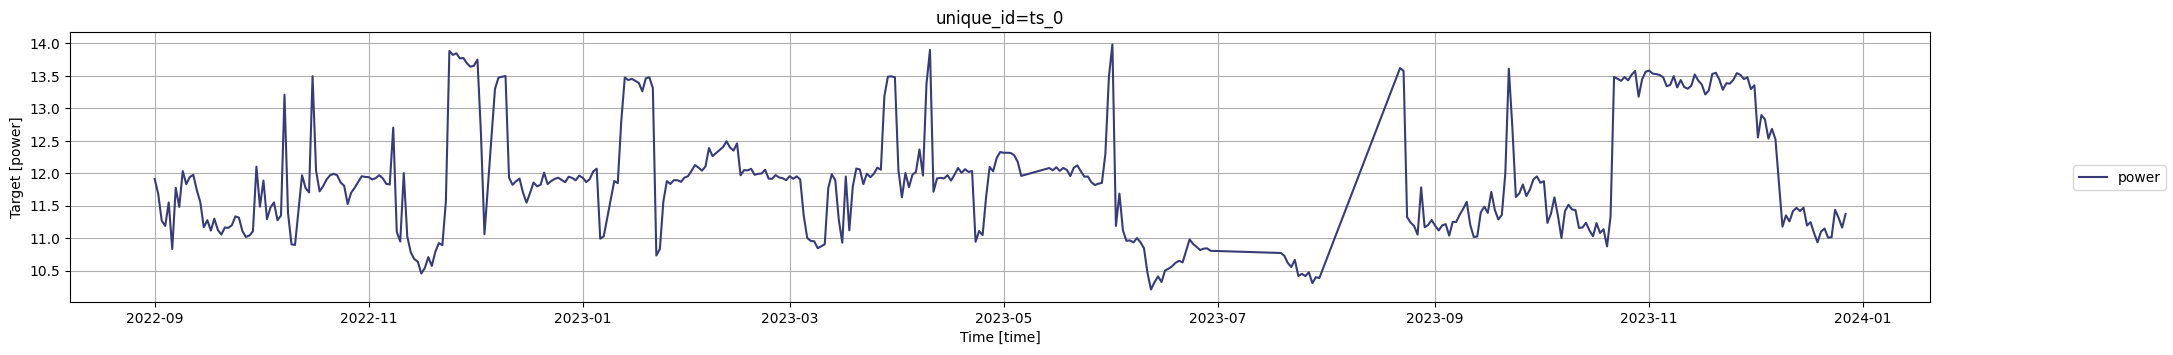

In [6]:
timegpt.plot(daily_averages_level1, time_col='time', target_col='power')

In [9]:
timegpt_anomalies_df = timegpt.detect_anomalies(daily_averages_level1, time_col='time', target_col='power', freq='D')
timegpt_anomalies_df.head()

INFO:nixtlats.timegpt:Validating inputs...
INFO:nixtlats.timegpt:Preprocessing dataframes...
INFO:nixtlats.timegpt:Calling Anomaly Detector Endpoint...


,time,anomaly,TimeGPT-lo-99,TimeGPT,TimeGPT-hi-99
0,2022-09-29,0,9.124433,11.207368,13.290303
1,2022-09-30,0,9.155138,11.238073,13.321009
2,2022-10-01,0,9.151325,11.234261,13.317196
3,2022-10-02,0,9.155503,11.238439,13.321374
4,2022-10-03,0,9.134298,11.217234,13.300169


INFO:nixtlats.timegpt:Validating inputs...
INFO:nixtlats.timegpt:Preprocessing dataframes...
INFO:nixtlats.timegpt:Calling Anomaly Detector Endpoint...
INFO:nixtlats.timegpt:Using the following exogenous variables: year_2022, year_2023, month_1, month_2, month_3, month_4, month_5, month_6, month_7, month_8, month_9, month_10, month_11, month_12, day_1, day_2, day_3, day_4, day_5, day_6, day_7, day_8, day_9, day_10, day_11, day_12, day_13, day_14, day_15, day_16, day_17, day_18, day_19, day_20, day_21, day_22, day_23, day_24, day_25, day_26, day_27, day_28, day_29, day_30, day_31, weekday_0, weekday_1, weekday_2, weekday_3, weekday_4, weekday_5, weekday_6


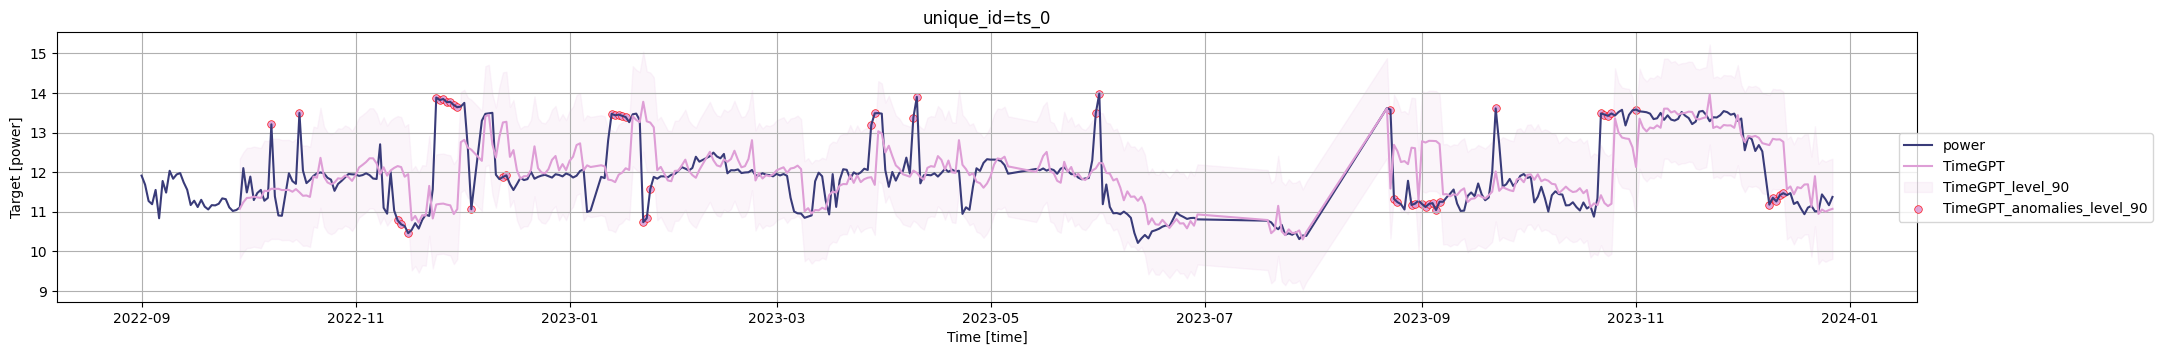

In [58]:
timegpt_anomalies_df_x = timegpt.detect_anomalies(
    daily_averages_level1, time_col='time', 
    target_col='power', 
    freq='D', 
    date_features=True,
    level=90,
)
timegpt.plot(daily_averages_level1, 
             timegpt_anomalies_df_x,
             time_col='time', 
             target_col='power')

INFO:nixtlats.timegpt:Validating inputs...
INFO:nixtlats.timegpt:Preprocessing dataframes...
INFO:nixtlats.timegpt:Calling Anomaly Detector Endpoint...
INFO:nixtlats.timegpt:Using the following exogenous variables: year_2022, year_2023, month_1, month_2, month_3, month_4, month_5, month_6, month_7, month_8, month_9, month_10, month_11, month_12, day_1, day_2, day_3, day_4, day_5, day_6, day_7, day_8, day_9, day_10, day_11, day_12, day_13, day_14, day_15, day_16, day_17, day_18, day_19, day_20, day_21, day_22, day_23, day_24, day_25, day_26, day_27, day_28, day_29, day_30, day_31, weekday_0, weekday_1, weekday_2, weekday_3, weekday_4, weekday_5, weekday_6


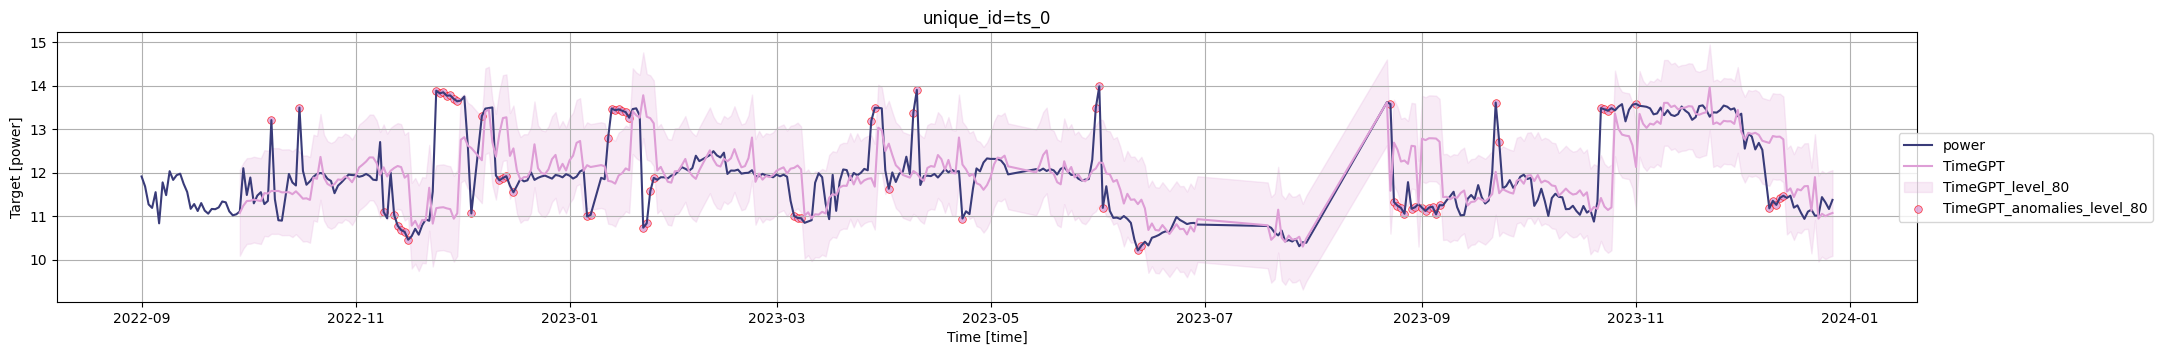

In [56]:
timegpt_anomalies_df_x = timegpt.detect_anomalies(
    daily_averages_level1, time_col='time', 
    target_col='power', 
    freq='D', 
    date_features=True,
    level=80,
)
timegpt.plot(
    daily_averages_level1, 
    timegpt_anomalies_df_x,
    time_col='time', 
    target_col='power',
)

INFO:nixtlats.timegpt:Validating inputs...
INFO:nixtlats.timegpt:Preprocessing dataframes...
INFO:nixtlats.timegpt:Calling Anomaly Detector Endpoint...
INFO:nixtlats.timegpt:Using the following exogenous variables: year_2022, year_2023, month_1, month_2, month_3, month_4, month_5, month_6, month_7, month_8, month_9, month_10, month_11, month_12, day_1, day_2, day_3, day_4, day_5, day_6, day_7, day_8, day_9, day_10, day_11, day_12, day_13, day_14, day_15, day_16, day_17, day_18, day_19, day_20, day_21, day_22, day_23, day_24, day_25, day_26, day_27, day_28, day_29, day_30, day_31, weekday_0, weekday_1, weekday_2, weekday_3, weekday_4, weekday_5, weekday_6


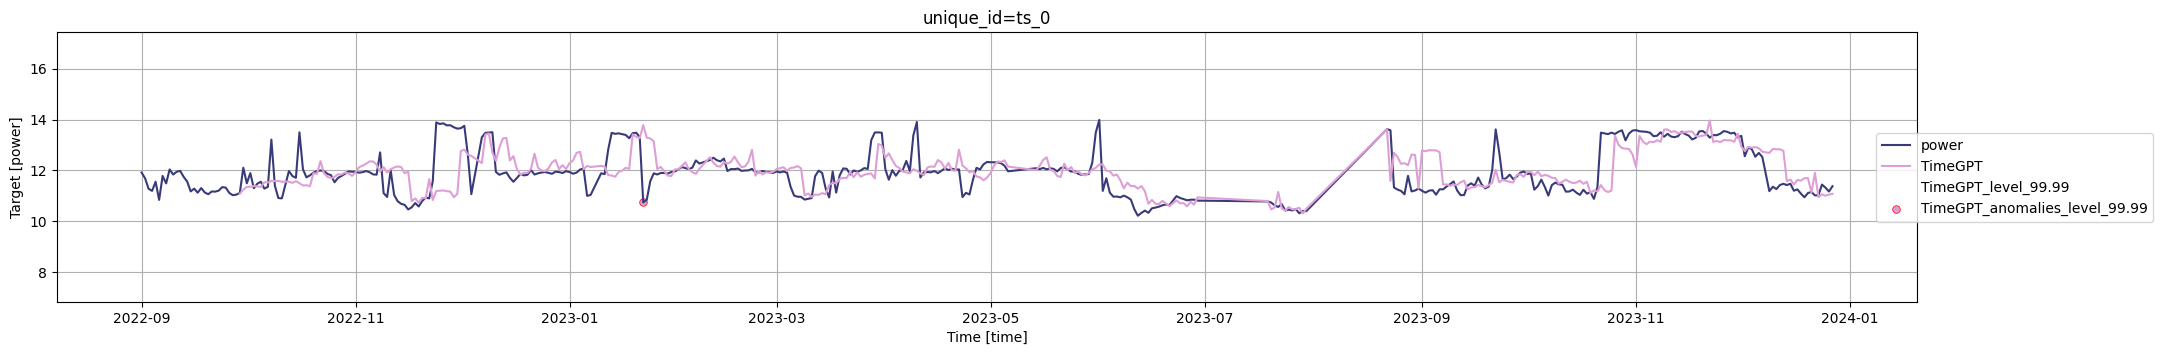

In [32]:
timegpt_anomalies_df_x = timegpt.detect_anomalies(
    daily_averages_level1, time_col='time', 
    target_col='power', 
    freq='D', 
    date_features=True,
    level=99.99,
)
timegpt.plot(
    daily_averages_level1, 
    timegpt_anomalies_df_x,
    time_col='time', 
    target_col='power',
)

INFO:nixtlats.timegpt:Validating inputs...
INFO:nixtlats.timegpt:Preprocessing dataframes...
INFO:nixtlats.timegpt:Calling Forecast Endpoint...


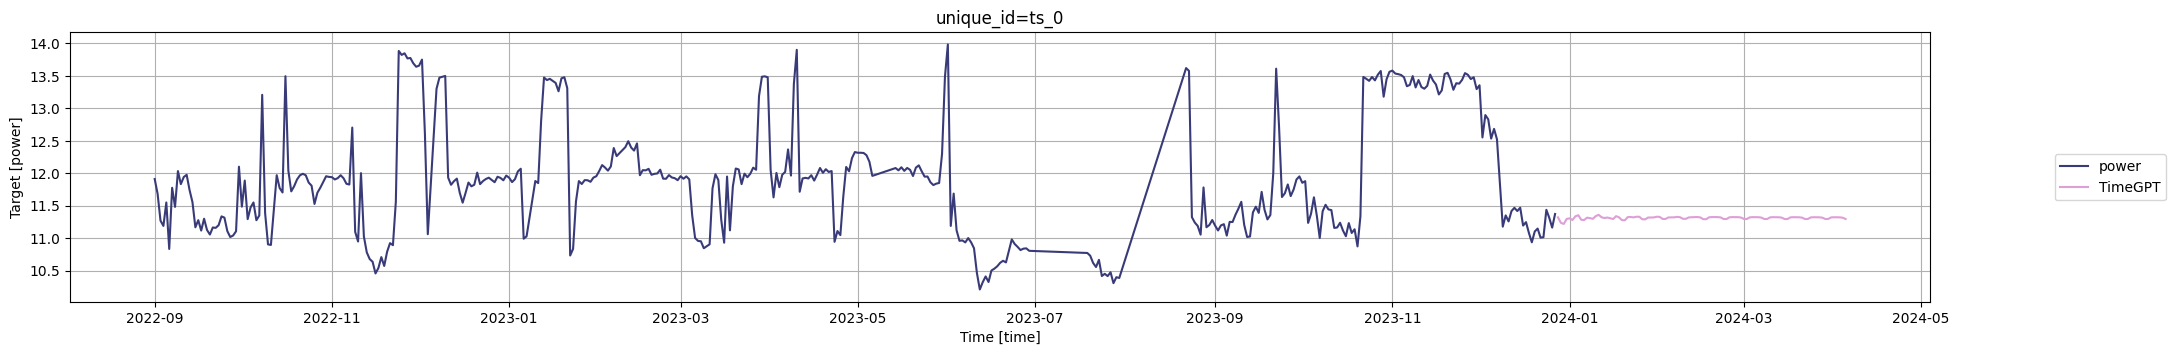

: 

In [59]:
timegpt_fcst_df = timegpt.forecast(df=daily_averages_level1, h=100, time_col='time', target_col='power', freq='D')
timegpt.plot(daily_averages_level1, timegpt_fcst_df, time_col='time', target_col='power')

In [36]:

timegpt_fcst_ex_vars_df = timegpt.forecast(df=df, X_df=future_ex_vars_df, h=24, level=[80, 90])
timegpt_fcst_ex_vars_df.head()

INFO:nixtlats.timegpt:Validating inputs...
INFO:nixtlats.timegpt:Preprocessing dataframes...


Exception: Could not infer frequency of ds column. This could be due to inconsistent intervals. Please check your data for missing, duplicated or irregular timestamps

<Axes: ylabel='features'>

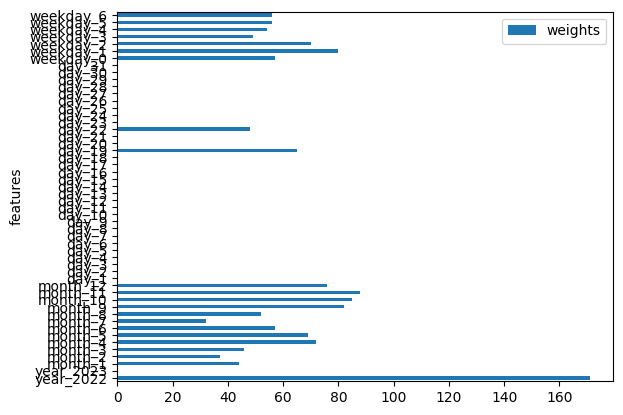

In [33]:
timegpt.weights_x.plot.barh(x='features', y='weights')

In [25]:
from nixtlats.date_features import CountryHolidays


INFO:nixtlats.timegpt:Validating inputs...
INFO:nixtlats.timegpt:Preprocessing dataframes...
INFO:nixtlats.timegpt:Using the following exogenous variables: year_2022, year_2023, year_2024, month_1, month_2, month_3, month_4, month_5, month_6, month_7, month_8, month_9, month_10, month_11, month_12, day_1, day_2, day_3, day_4, day_5, day_6, day_7, day_8, day_9, day_10, day_11, day_12, day_13, day_14, day_15, day_16, day_17, day_18, day_19, day_20, day_21, day_22, day_23, day_24, day_25, day_26, day_27, day_28, day_29, day_30, day_31, weekday_0, weekday_1, weekday_2, weekday_3, weekday_4, weekday_5, weekday_6
INFO:nixtlats.timegpt:Calling Forecast Endpoint...


<Axes: ylabel='features'>

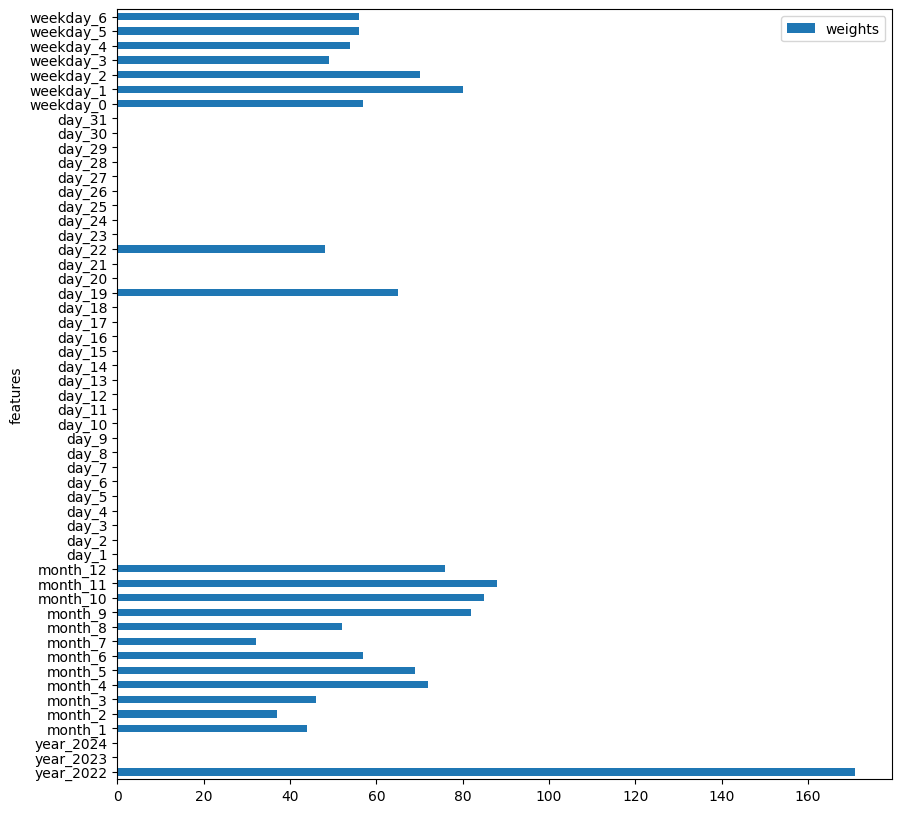

In [37]:
fcst_pltr_calendar_df = timegpt.forecast(
    df=daily_averages_level1, h=14, freq='D',
    time_col='time', target_col='power',
    date_features=(True)
)
timegpt.weights_x.plot.barh(x='features', y='weights', figsize=(10, 10))

In [48]:
timegpt_fcst_df = timegpt.forecast(df=daily_averages_level1, h=100, freq='D', time_col='time', target_col='power')
timegpt_fcst_df.head()


INFO:nixtlats.timegpt:Validating inputs...
INFO:nixtlats.timegpt:Preprocessing dataframes...
INFO:nixtlats.timegpt:Calling Forecast Endpoint...


,time,TimeGPT
0,2023-12-28,11.323235
1,2023-12-29,11.238646
2,2023-12-30,11.221702
3,2023-12-31,11.299282
4,2024-01-01,11.307529


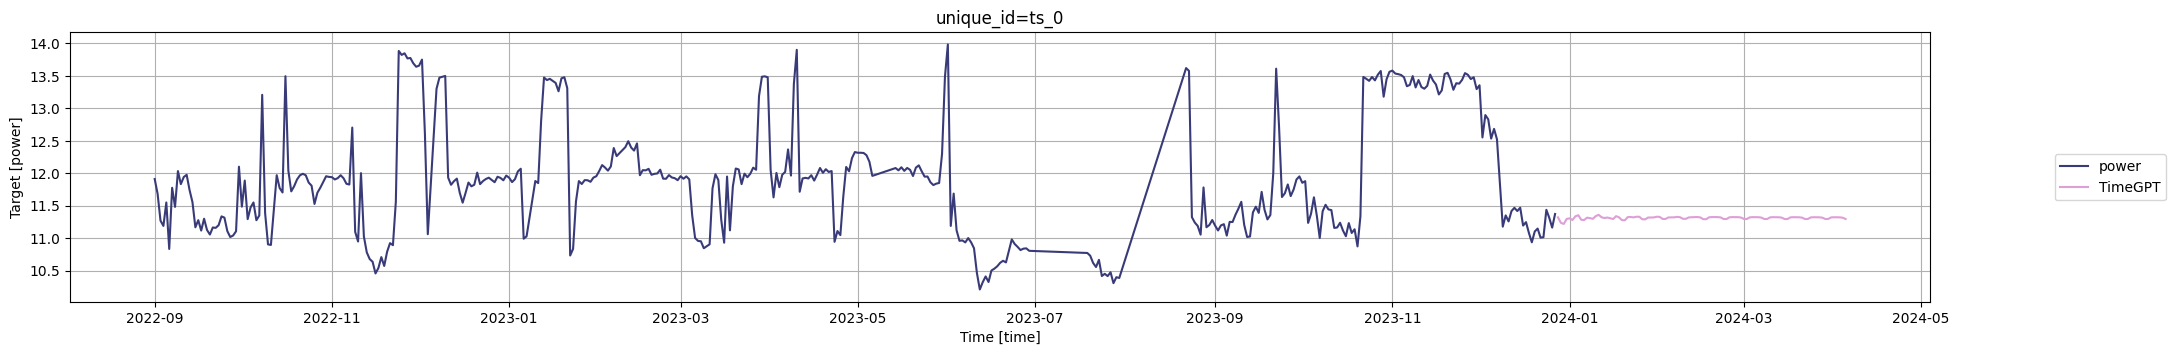

In [49]:
timegpt.plot(daily_averages_level1, timegpt_fcst_df, time_col='time', target_col='power')


In [ ]:
fcst_pltr_calendar_df = timegpt.forecast(
    df=daily_averages_level1, h=14, freq='D',
    time_col='time', target_col='power',
    date_features=[CountryHolidays(['US'])]
)
timegpt.weights_x.plot.barh(x='features', y='weights', figsize=(10, 10))

## LEVEL 2

In [20]:
# Read the CSV file and parse the 'time' column as datetime, setting it as index
lol = pd.read_csv('combined_level2.csv', parse_dates=['time'],  usecols=['time', 'power'])
lol.head()
lol['time'] = pd.to_datetime(lol['time'])

# Group by day, calculate daily average of 'y', and retain 'unique_id' as 1
daily_averages = lol.groupby(lol['time'].dt.date)['power'].mean().reset_index()

# Convert 'day' column back to a datetime object if needed
daily_averages['time'] = pd.to_datetime(daily_averages['time'])
daily_averages.head()

,time,power
0,2022-09-01,42.385919
1,2022-09-02,42.364217
2,2022-09-03,41.838710
3,2022-09-04,41.760000
4,2022-09-05,41.995526


In [14]:
filename = lol
x_column = 'time'
y_column = 'power'
df = load_data(filename,x_column,y_column)

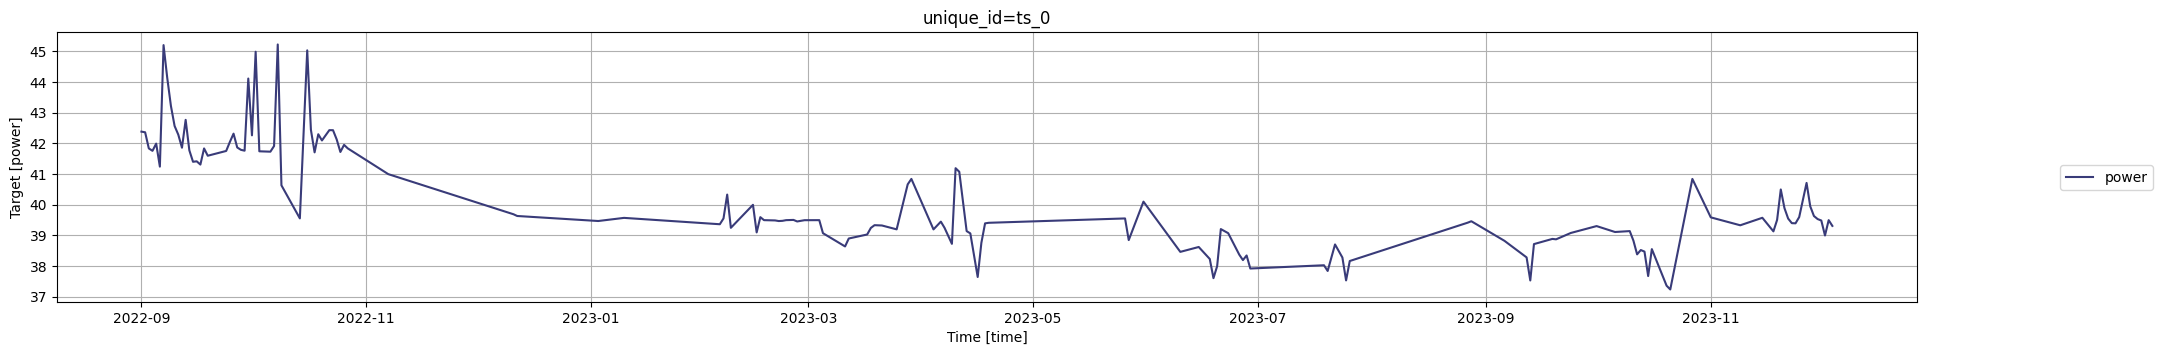

In [21]:
timegpt.plot(daily_averages, time_col='time', target_col='power')

In [23]:
timegpt_anomalies_df = timegpt.detect_anomalies(daily_averages, time_col='time', target_col='power', freq='D')
timegpt_anomalies_df.head()

INFO:nixtlats.timegpt:Validating inputs...
INFO:nixtlats.timegpt:Preprocessing dataframes...
INFO:nixtlats.timegpt:Calling Anomaly Detector Endpoint...


,time,anomaly,TimeGPT-lo-99,TimeGPT,TimeGPT-hi-99
0,2022-10-04,0,40.445242,42.147999,43.850756
1,2022-10-05,0,40.528074,42.230831,43.933588
2,2022-10-06,0,40.593710,42.296467,43.999224
3,2022-10-07,0,40.641398,42.344154,44.046911
4,2022-10-08,1,40.616346,42.319103,44.021860


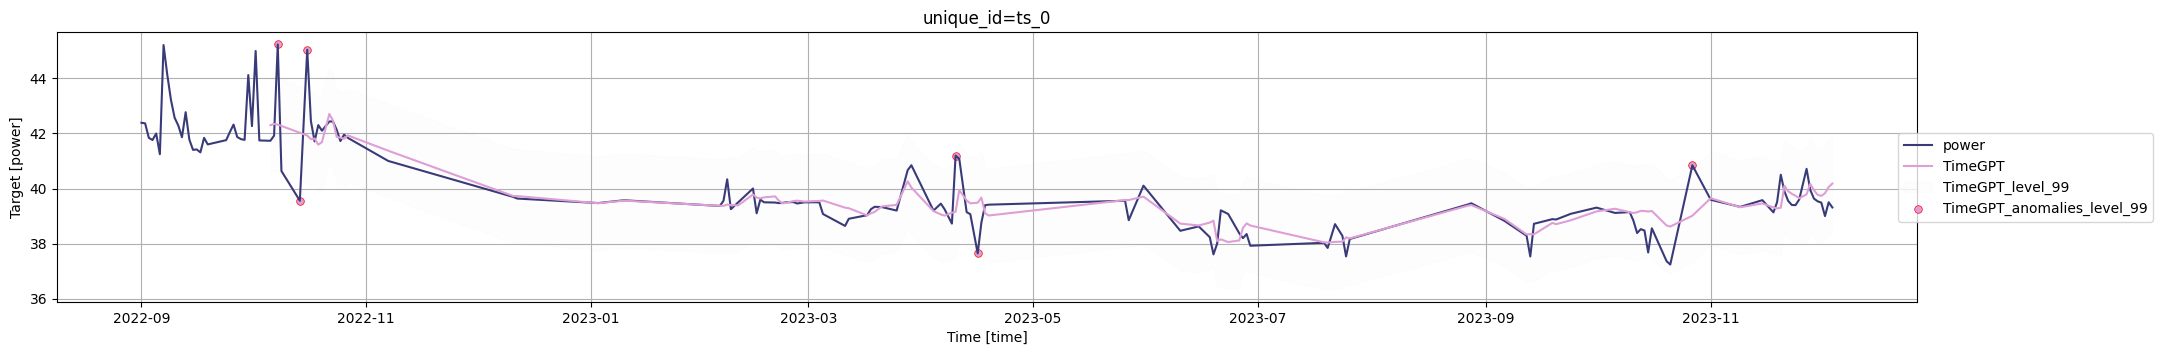

In [24]:

timegpt.plot(daily_averages, 
             timegpt_anomalies_df,
             time_col='time', 
             target_col='power')

In [ ]:
fcst_df = timegpt.forecast(daily_averages, h=24, level=[80, 90])

